Machine Learning Models<br>
__Compare models using barplot
Accuracy score algorithm__ <br>
__Summary__
1. Logistic Regression
2. KNN -> k-nearest neighbour
3. SVM - support vector machine
4. Naive Bayes- Gausian Naive Bayes
5. Decision Tree Classifier
6. Random Forest Classifier
7. Confusion Matrices

In [1]:
# Import libraries
import pandas as pd # data processing, csv file
import matplotlib.pyplot as plt # plotting
import seaborn as sns # Data visualization
import numpy as np # Linear algebra

# Libraries for LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Control Display! this is optional
pd.options.display.max_columns=50
sns.set(style='darkgrid', rc={'axes.facecolor':'#DCDCDC'})

# IGNORE THE WARNINGS ENCOUNTTERED
import warnings
warnings.filterwarnings('ignore')

In [2]:
disease = pd.read_csv('heart_disease.csv')
disease.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
"""__summary
cp = chest pain
trestbp= resting blood pressure
chol = cholesterol
fbs=fasting blood sugar
restecg=resting elctrocardiography
exang = exercise induced again
oldpeak= ST depression induced
slope = the slope of peak exercise
ca = number of major vessel
thal = normal, texted defect, reversible defect
target = have disease or not (1=yes, 0=no)
"""

'__summary\ncp = chest pain\ntrestbp= resting blood pressure\nchol = cholesterol\nfbs=fasting blood sugar\nrestecg=resting elctrocardiography\nexang = exercise induced again\noldpeak= ST depression induced\nslope = the slope of peak exercise\nca = number of major vessel\nthal = normal, texted defect, reversible defect\ntarget = have disease or not (1=yes, 0=no)\n'

In [6]:
# Logistic Regression -> Predict one or more possible outcomes either 0 or 1
# column targets 
disease.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
# Show the mean 
disease.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [8]:
# Show percentage of male and female of those with heart disease
count_female = len(disease[disease.sex == 0])
count_male = len(disease[disease.sex == 1])

#Show the output
print('Percentage of female Patients: {:.2f}%'.format(count_female/len(disease.sex)*100))
print('Percentage of male Patients: {:.2f}%'.format(count_male/len(disease.sex)*100))

Percentage of female Patients: 30.44%
Percentage of male Patients: 69.56%


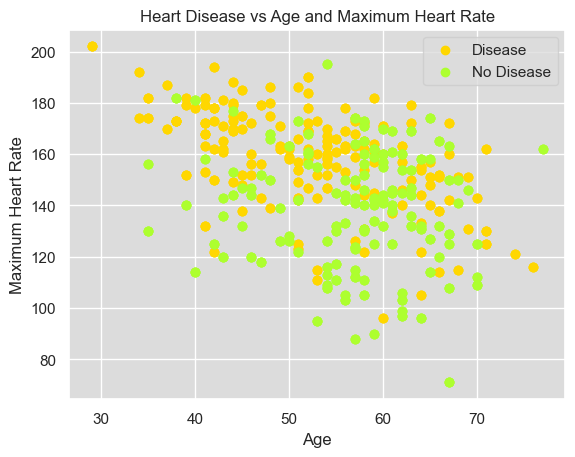

In [9]:
# Create a scatter plot for heart disease vs Age and maximum heart rate
plt.scatter(x=disease.age[disease.target ==1], y =disease.thalach[disease.target ==1], c='#FFD700', label ='Disease')
plt.scatter(x=disease.age[disease.target ==0], y =disease.thalach[disease.target ==0], c='#ADFF2F', label ='No Disease')

#Add a legend
plt.legend()
#Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

#Set the title
plt.title('Heart Disease vs Age and Maximum Heart Rate')

#show the plot
plt.show()

In [10]:
# Create a logistic Regression
# helps to solve problems with classification / 
# Create independent variable and dependent variable

# ML for Training and Testing the dataset
# Create Logistic Regression
y = disease.target.values # For making the other variables dependent
x_data = disease.drop(['target'], axis=1) # Make 'target' variable only independent variable


In [11]:
# Split the data for training=79 and testing=21
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.21, random_state=41)

In [12]:
# Check shape of the data remaining after splitting into training and testing
X_train.shape, X_test.shape

((809, 13), (216, 13))

In [13]:
# Check the datatype
X_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object